# Breast Cancer

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [13]:
# breast_cancer dataset laod
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

In [14]:
X = breast_cancer.data
Y = breast_cancer.target

In [11]:
X[:3,:]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [21]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [15]:
# 훈련데이터셋 테스트데이터셋 (8:2)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

In [22]:
# 모델 설정
model = Sequential([
    Dense(30, input_dim=30, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
]) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,415
Trainable params: 1,415
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 모델 컴파일 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
# 모델 저장 폴더 설정
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [25]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "final{epoch:03d}-{val_loss:.4f}.hdf5"

checkpointer_callback = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [26]:
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [27]:
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=500,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer_callback])


Epoch 00001: val_loss improved from inf to 134.33994, saving model to ./model/final001-134.3399.hdf5

Epoch 00002: val_loss improved from 134.33994 to 127.64584, saving model to ./model/final002-127.6458.hdf5

Epoch 00003: val_loss improved from 127.64584 to 121.05027, saving model to ./model/final003-121.0503.hdf5

Epoch 00004: val_loss improved from 121.05027 to 114.54957, saving model to ./model/final004-114.5496.hdf5

Epoch 00005: val_loss improved from 114.54957 to 108.13517, saving model to ./model/final005-108.1352.hdf5

Epoch 00006: val_loss improved from 108.13517 to 101.80666, saving model to ./model/final006-101.8067.hdf5

Epoch 00007: val_loss improved from 101.80666 to 95.57147, saving model to ./model/final007-95.5715.hdf5

Epoch 00008: val_loss improved from 95.57147 to 89.53135, saving model to ./model/final008-89.5313.hdf5

Epoch 00009: val_loss improved from 89.53135 to 83.76739, saving model to ./model/final009-83.7674.hdf5

Epoch 00010: val_loss improved from 83.76


Epoch 00107: val_loss improved from 0.78082 to 0.77685, saving model to ./model/final107-0.7768.hdf5

Epoch 00108: val_loss improved from 0.77685 to 0.77237, saving model to ./model/final108-0.7724.hdf5

Epoch 00109: val_loss improved from 0.77237 to 0.76757, saving model to ./model/final109-0.7676.hdf5

Epoch 00110: val_loss improved from 0.76757 to 0.76265, saving model to ./model/final110-0.7626.hdf5

Epoch 00111: val_loss improved from 0.76265 to 0.75770, saving model to ./model/final111-0.7577.hdf5

Epoch 00112: val_loss improved from 0.75770 to 0.75289, saving model to ./model/final112-0.7529.hdf5

Epoch 00113: val_loss improved from 0.75289 to 0.74831, saving model to ./model/final113-0.7483.hdf5

Epoch 00114: val_loss improved from 0.74831 to 0.74407, saving model to ./model/final114-0.7441.hdf5

Epoch 00115: val_loss improved from 0.74407 to 0.74020, saving model to ./model/final115-0.7402.hdf5

Epoch 00116: val_loss improved from 0.74020 to 0.73671, saving model to ./model/f


Epoch 00202: val_loss improved from 0.31618 to 0.31476, saving model to ./model/final202-0.3148.hdf5

Epoch 00203: val_loss improved from 0.31476 to 0.31305, saving model to ./model/final203-0.3130.hdf5

Epoch 00204: val_loss improved from 0.31305 to 0.31103, saving model to ./model/final204-0.3110.hdf5

Epoch 00205: val_loss improved from 0.31103 to 0.30881, saving model to ./model/final205-0.3088.hdf5

Epoch 00206: val_loss improved from 0.30881 to 0.30657, saving model to ./model/final206-0.3066.hdf5

Epoch 00207: val_loss improved from 0.30657 to 0.30446, saving model to ./model/final207-0.3045.hdf5

Epoch 00208: val_loss improved from 0.30446 to 0.30252, saving model to ./model/final208-0.3025.hdf5

Epoch 00209: val_loss improved from 0.30252 to 0.30081, saving model to ./model/final209-0.3008.hdf5

Epoch 00210: val_loss improved from 0.30081 to 0.29942, saving model to ./model/final210-0.2994.hdf5

Epoch 00211: val_loss improved from 0.29942 to 0.29823, saving model to ./model/f


Epoch 00311: val_loss improved from 0.25357 to 0.25328, saving model to ./model/final311-0.2533.hdf5

Epoch 00312: val_loss improved from 0.25328 to 0.25277, saving model to ./model/final312-0.2528.hdf5

Epoch 00313: val_loss improved from 0.25277 to 0.25217, saving model to ./model/final313-0.2522.hdf5

Epoch 00314: val_loss improved from 0.25217 to 0.25155, saving model to ./model/final314-0.2515.hdf5

Epoch 00315: val_loss improved from 0.25155 to 0.25108, saving model to ./model/final315-0.2511.hdf5

Epoch 00316: val_loss improved from 0.25108 to 0.25084, saving model to ./model/final316-0.2508.hdf5

Epoch 00317: val_loss improved from 0.25084 to 0.25080, saving model to ./model/final317-0.2508.hdf5

Epoch 00318: val_loss did not improve from 0.25080

Epoch 00319: val_loss improved from 0.25080 to 0.25079, saving model to ./model/final319-0.2508.hdf5

Epoch 00320: val_loss improved from 0.25079 to 0.25059, saving model to ./model/final320-0.2506.hdf5

Epoch 00321: val_loss improve


Epoch 00411: val_loss did not improve from 0.23473

Epoch 00412: val_loss did not improve from 0.23473

Epoch 00413: val_loss did not improve from 0.23473

Epoch 00414: val_loss did not improve from 0.23473

Epoch 00415: val_loss improved from 0.23473 to 0.23444, saving model to ./model/final415-0.2344.hdf5

Epoch 00416: val_loss improved from 0.23444 to 0.23391, saving model to ./model/final416-0.2339.hdf5

Epoch 00417: val_loss improved from 0.23391 to 0.23361, saving model to ./model/final417-0.2336.hdf5

Epoch 00418: val_loss improved from 0.23361 to 0.23355, saving model to ./model/final418-0.2336.hdf5

Epoch 00419: val_loss did not improve from 0.23355

Epoch 00420: val_loss did not improve from 0.23355

Epoch 00421: val_loss did not improve from 0.23355

Epoch 00422: val_loss did not improve from 0.23355

Epoch 00423: val_loss improved from 0.23355 to 0.23322, saving model to ./model/final423-0.2332.hdf5

Epoch 00424: val_loss improved from 0.23322 to 0.23236, saving model to .


Epoch 00531: val_loss did not improve from 0.21506

Epoch 00532: val_loss did not improve from 0.21506

Epoch 00533: val_loss did not improve from 0.21506

Epoch 00534: val_loss improved from 0.21506 to 0.21476, saving model to ./model/final534-0.2148.hdf5

Epoch 00535: val_loss improved from 0.21476 to 0.21418, saving model to ./model/final535-0.2142.hdf5

Epoch 00536: val_loss did not improve from 0.21418

Epoch 00537: val_loss did not improve from 0.21418

Epoch 00538: val_loss did not improve from 0.21418

Epoch 00539: val_loss did not improve from 0.21418

Epoch 00540: val_loss did not improve from 0.21418

Epoch 00541: val_loss did not improve from 0.21418

Epoch 00542: val_loss did not improve from 0.21418

Epoch 00543: val_loss did not improve from 0.21418

Epoch 00544: val_loss improved from 0.21418 to 0.21373, saving model to ./model/final544-0.2137.hdf5

Epoch 00545: val_loss improved from 0.21373 to 0.21348, saving model to ./model/final545-0.2135.hdf5

Epoch 00546: val_lo


Epoch 00668: val_loss did not improve from 0.18881

Epoch 00669: val_loss did not improve from 0.18881

Epoch 00670: val_loss did not improve from 0.18881

Epoch 00671: val_loss did not improve from 0.18881

Epoch 00672: val_loss did not improve from 0.18881

Epoch 00673: val_loss did not improve from 0.18881

Epoch 00674: val_loss did not improve from 0.18881

Epoch 00675: val_loss did not improve from 0.18881

Epoch 00676: val_loss did not improve from 0.18881

Epoch 00677: val_loss did not improve from 0.18881

Epoch 00678: val_loss did not improve from 0.18881

Epoch 00679: val_loss did not improve from 0.18881

Epoch 00680: val_loss improved from 0.18881 to 0.18785, saving model to ./model/final680-0.1879.hdf5

Epoch 00681: val_loss improved from 0.18785 to 0.18767, saving model to ./model/final681-0.1877.hdf5

Epoch 00682: val_loss did not improve from 0.18767

Epoch 00683: val_loss did not improve from 0.18767

Epoch 00684: val_loss improved from 0.18767 to 0.18729, saving mode


Epoch 00823: val_loss did not improve from 0.17660

Epoch 00824: val_loss did not improve from 0.17660

Epoch 00825: val_loss did not improve from 0.17660

Epoch 00826: val_loss did not improve from 0.17660

Epoch 00827: val_loss did not improve from 0.17660

Epoch 00828: val_loss did not improve from 0.17660

Epoch 00829: val_loss did not improve from 0.17660

Epoch 00830: val_loss did not improve from 0.17660

Epoch 00831: val_loss did not improve from 0.17660

Epoch 00832: val_loss did not improve from 0.17660

Epoch 00833: val_loss did not improve from 0.17660

Epoch 00834: val_loss improved from 0.17660 to 0.17653, saving model to ./model/final834-0.1765.hdf5

Epoch 00835: val_loss did not improve from 0.17653

Epoch 00836: val_loss did not improve from 0.17653

Epoch 00837: val_loss improved from 0.17653 to 0.17629, saving model to ./model/final837-0.1763.hdf5

Epoch 00838: val_loss did not improve from 0.17629

Epoch 00839: val_loss improved from 0.17629 to 0.17441, saving mode


Epoch 00968: val_loss did not improve from 0.15525

Epoch 00969: val_loss did not improve from 0.15525

Epoch 00970: val_loss did not improve from 0.15525

Epoch 00971: val_loss did not improve from 0.15525

Epoch 00972: val_loss did not improve from 0.15525

Epoch 00973: val_loss did not improve from 0.15525

Epoch 00974: val_loss did not improve from 0.15525

Epoch 00975: val_loss improved from 0.15525 to 0.15345, saving model to ./model/final975-0.1534.hdf5

Epoch 00976: val_loss did not improve from 0.15345

Epoch 00977: val_loss did not improve from 0.15345

Epoch 00978: val_loss did not improve from 0.15345

Epoch 00979: val_loss did not improve from 0.15345

Epoch 00980: val_loss did not improve from 0.15345

Epoch 00981: val_loss did not improve from 0.15345

Epoch 00982: val_loss improved from 0.15345 to 0.15312, saving model to ./model/final982-0.1531.hdf5

Epoch 00983: val_loss did not improve from 0.15312

Epoch 00984: val_loss improved from 0.15312 to 0.15078, saving mode


Epoch 01121: val_loss did not improve from 0.13409

Epoch 01122: val_loss did not improve from 0.13409

Epoch 01123: val_loss improved from 0.13409 to 0.13314, saving model to ./model/final1123-0.1331.hdf5

Epoch 01124: val_loss did not improve from 0.13314

Epoch 01125: val_loss did not improve from 0.13314

Epoch 01126: val_loss did not improve from 0.13314

Epoch 01127: val_loss did not improve from 0.13314

Epoch 01128: val_loss did not improve from 0.13314

Epoch 01129: val_loss did not improve from 0.13314

Epoch 01130: val_loss did not improve from 0.13314

Epoch 01131: val_loss did not improve from 0.13314

Epoch 01132: val_loss did not improve from 0.13314

Epoch 01133: val_loss did not improve from 0.13314

Epoch 01134: val_loss did not improve from 0.13314

Epoch 01135: val_loss did not improve from 0.13314

Epoch 01136: val_loss did not improve from 0.13314

Epoch 01137: val_loss did not improve from 0.13314

Epoch 01138: val_loss did not improve from 0.13314

Epoch 01139:


Epoch 01275: val_loss did not improve from 0.12102

Epoch 01276: val_loss did not improve from 0.12102

Epoch 01277: val_loss did not improve from 0.12102

Epoch 01278: val_loss did not improve from 0.12102

Epoch 01279: val_loss did not improve from 0.12102

Epoch 01280: val_loss did not improve from 0.12102

Epoch 01281: val_loss did not improve from 0.12102

Epoch 01282: val_loss did not improve from 0.12102

Epoch 01283: val_loss did not improve from 0.12102

Epoch 01284: val_loss did not improve from 0.12102

Epoch 01285: val_loss did not improve from 0.12102

Epoch 01286: val_loss improved from 0.12102 to 0.12043, saving model to ./model/final1286-0.1204.hdf5

Epoch 01287: val_loss did not improve from 0.12043

Epoch 01288: val_loss did not improve from 0.12043

Epoch 01289: val_loss did not improve from 0.12043

Epoch 01290: val_loss did not improve from 0.12043

Epoch 01291: val_loss did not improve from 0.12043

Epoch 01292: val_loss did not improve from 0.12043

Epoch 01293:


Epoch 01437: val_loss did not improve from 0.11348

Epoch 01438: val_loss did not improve from 0.11348

Epoch 01439: val_loss did not improve from 0.11348

Epoch 01440: val_loss did not improve from 0.11348

Epoch 01441: val_loss did not improve from 0.11348

Epoch 01442: val_loss did not improve from 0.11348

Epoch 01443: val_loss did not improve from 0.11348

Epoch 01444: val_loss did not improve from 0.11348

Epoch 01445: val_loss did not improve from 0.11348

Epoch 01446: val_loss did not improve from 0.11348

Epoch 01447: val_loss did not improve from 0.11348

Epoch 01448: val_loss did not improve from 0.11348

Epoch 01449: val_loss did not improve from 0.11348

Epoch 01450: val_loss did not improve from 0.11348

Epoch 01451: val_loss did not improve from 0.11348

Epoch 01452: val_loss did not improve from 0.11348

Epoch 01453: val_loss did not improve from 0.11348

Epoch 01454: val_loss did not improve from 0.11348

Epoch 01455: val_loss did not improve from 0.11348

Epoch 01456

In [31]:
del model
model = load_model('model/final1462-0.1100.hdf5')
print("\n Accuracy: %.4f" % (model.evaluate(X_test, y_test, verbose=2)[1]))

114/114 - 0s - loss: 0.0622 - accuracy: 0.9825

 Accuracy: 0.9825


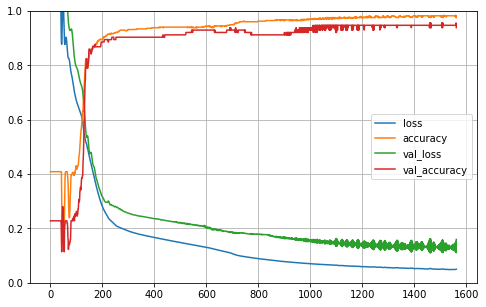

In [30]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()